# Hypothesis Testing - Cumulative Lab

## Introduction

In this cumulative lab, you will use pandas to clean up a dataset and perform some EDA, then perform statistical tests and interpret their results in order to answer some business questions.

## Objectives

You will be able to:

* Practice using a data dictionary
* Practice using pandas to prepare data for statistical analysis
* Practice identifying an appropriate statistical test for a given question
* Practice defining the null and alternative hypotheses
* Practice executing statistical tests and interpreting their results

## Your Task: Analyzing Health Trends

![tissues and tea mug](images/sick_day.jpg)

Photo by <a href="https://unsplash.com/@kellysikkema?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kelly Sikkema</a> on <a href="/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of the 2017-2018 survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1. How does health status, represented by average number of days with bad physical health in the past month (`PHYSHLTH`), differ by state?					 								
2. Digging deeper into the data, what are some factors that impact health (demographics, behaviors, etc.)?	

### Data Understanding

To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`.

There is also a PDF data dictionary called `data_dictionary.pdf`, which explains the meanings of the features and codes contained in this dataset.

Both files are located in the `data/` directory of this repository.

Prior to each statistical test, you will need to perform some data preparation, which could include:

* Filtering out rows with irrelevant values
* Transforming data from codes into human-readable values
* Binning data to transform it from numeric to categorical
* Creating new columns based on queries of the values in other columns

For steps 2-5, you will need to select and execute an appropriate statistical test. Recall these tests we have learned so far:

1. [Chi-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html): used for comparing a categorical feature against a categorical feature, to determine whether they are independent
2. [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html): used for comparing two categories of a numeric feature, to determine whether their means are the same across categories
3. [ANOVA](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm): used for comparing more than two categories of a numeric feature, to determine whether their means are the same across categories

### Requirements

#### 1. Prepare `PHYSHLTH` Data for Analysis

Using the data dictionary, ensure that you understand the meaning of the `PHYSHLTH` column. Then clean the data so that only valid records of `PHYSHLTH` remain.

#### 2. Describe the Distribution of Health Status by State

Does health status (`PHYSHLTH`) differ by state (`STATE_`)? If so, by how much, and is it statistically significant?

#### 3. Describe the Relationship between Health Status and Home Ownership Status

Does health status (`PHYSHLTH`) differ between home owners and renters (`RENTHOM1`)? If so, by how much, and is it statistically significant?

#### 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Does chronic sickness (`PHYSHLTH >= 15`) differ based on nicotine use (various columns)? If so, by how much, and is it statistically significant?

#### 5. Choose Your Own Question

Thinking about the business case, what is another question that might be useful to answer? Perform all analysis steps to answer this question.

## 1. Prepare `PHYSHLTH` Data for Analysis

In the cells below, we include the relevant imports and load the data into a dataframe called `df`:

In [1]:
# Run this cell without changes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Run this cell without changes
df = pd.read_csv("data/case_study.csv", index_col=0, low_memory=False)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Our main column of interest is called `PHYSHLTH`. We display summary statistics and plot a distribution below:

In [3]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

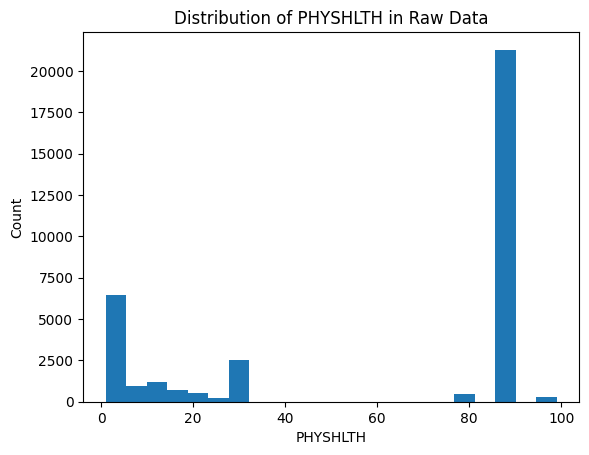

In [4]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"], bins="auto")
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Raw Data")
plt.show();

This feature is supposed to represent the number of days with bad physical health out of the past 30 days. Do you see anything wrong with what is displayed above? Explain.

In [5]:
df.PHYSHLTH.unique()

array([88.,  2., 28.,  5., 30.,  4.,  3., 77., 15., 29.,  7., 10., 14.,
        6.,  1.,  8., 25., 99., 20., 12., 18., 27., 21., 19., 22.,  9.,
       13., 17., 11., 16., 24., 26., 23.])

In [6]:
# Replace None with appropriate text
"""
plots more than 30 days are observed in the x-axis
"""

'\nplots more than 30 days are observed in the x-axis\n'

Look in the data dictionary, page 17, to understand what is happening with these values. Then edit the cell below so:

* The records where the `PHYSHLTH` value label is `None` are converted to 0
* The records where the `PHYSHLTH` value label is `Number of days` are kept as-is
* All other records are dropped (i.e. records with `Don't know/Not sure`, `Refused`, and `Not asked or Missing` value labels for `PHYSHLTH` are dropped)

In [7]:
# Your code here
df["PHYSHLTH"].value_counts()

PHYSHLTH
88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: count, dtype: int64

In [5]:
import warnings
warnings.filterwarnings('ignore')
# Step 1: Dropping rows where 'PHYSHLTH' is 77 or 99 that have records with Don't know/Not sure, Refused, and Not asked or Missing value labels for PHYSHLTH are dropped)
df = df[~df['PHYSHLTH'].isin([77, 99])]

# Step 2: Replace 88 with 0 since records have None
df['PHYSHLTH'] = df['PHYSHLTH'].replace(88, 0)

# Step 3: Filter values between 0 and 30 (inclusive)
df_filtered = df[(df['PHYSHLTH'] >= 0) & (df['PHYSHLTH'] <= 30)]
df_filtered

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Run the code below to ensure you have the correct, cleaned dataframe:

In [6]:
# Run this cell without changes

# We should have fewer rows, the same number of columns
assert df.shape == (33747, 358)

# The maximum value in this column should now be 30
assert df["PHYSHLTH"].max() == 30.0

Now we can look at the same descriptive information on our cleaned data:

In [7]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

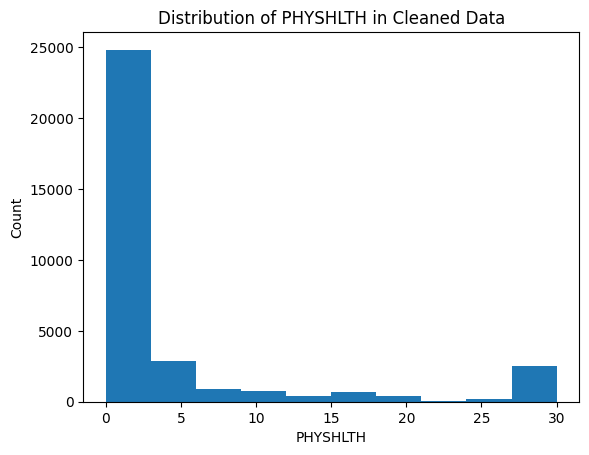

In [8]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"])
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Cleaned Data")
plt.show();

That looks a lot more reasonable. Let's move on to the next step.

## 2. Describe the Distribution of Health Status by State

As mentioned previously, this dataset only includes data from three states.

In [9]:
# Run this cell without changes
df["_STATE"].value_counts()

_STATE
36.0    11876
34.0    11458
9.0     10413
Name: count, dtype: int64

Look in the data dictionary, pages 2-3, to determine which states map onto which codes. Then replace the numbers with strings representing the state names.

In [10]:
# Your code here
# Create the mapping dictionary
state_mapping = {
    36.0: 'New York',
    34.0: 'New Jersey',
    9.0: 'Connecticut'
}

# Replace state codes with state names
df['_STATE'] = df['_STATE'].replace(state_mapping)

Below, we check the values:

In [11]:
# Run this cell without changes

# Shape should be the same
assert df.shape == (33747, 358)

# Values in state column should be changed
assert sorted(list(df["_STATE"].value_counts().index)) == ['Connecticut', 'New Jersey', 'New York']

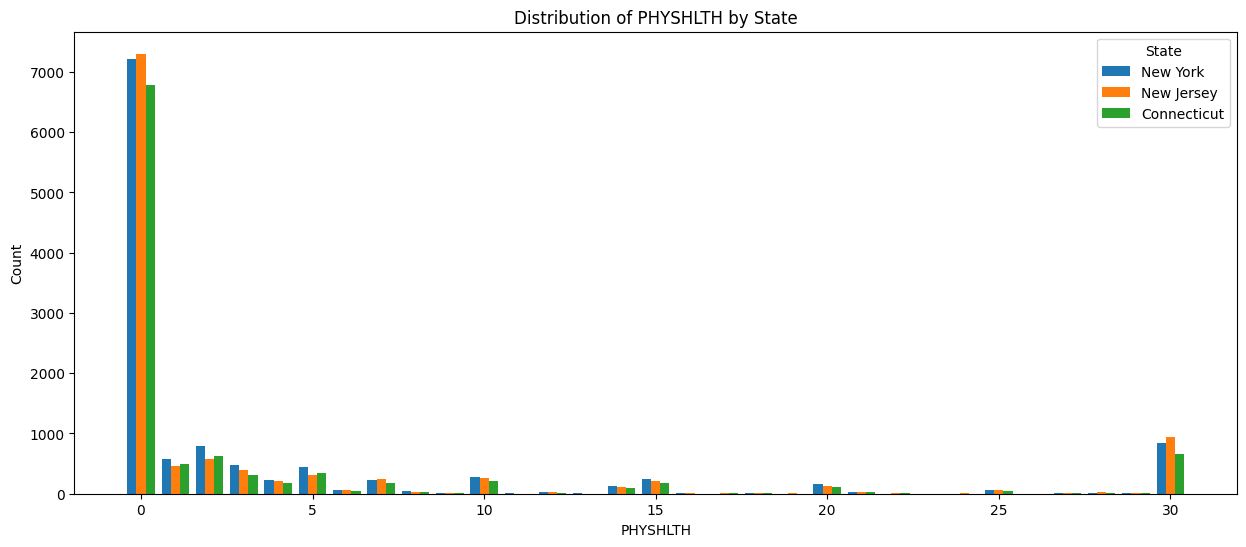

In [12]:
# Run this cell without changes

ny = df.loc[df["_STATE"] == "New York", "PHYSHLTH"]
nj = df.loc[df["_STATE"] == "New Jersey", "PHYSHLTH"]
ct = df.loc[df["_STATE"] == "Connecticut", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[ny, nj, ct],
    label=["New York", "New Jersey", "Connecticut"],
    bins=range(32),
    align="left"
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH by State")

ax.legend(title="State")
plt.show();

Looking at the plot above, does the distribution seem to differ by state?

(Just answer based on a visual inspection; we will do the statistical assessment next.)

In [13]:
# Replace None with appropriate text
"""
New York generally seems to have more days with bad health than New Jersey and Connecticut.
New Jersey and Connecticut appear to have a more favorable health status compared to New York.
"""

'\nNew York generally seems to have more days with bad health than New Jersey and Connecticut.\nNew Jersey and Connecticut appear to have a more favorable health status compared to New York.\n'

For the statistical test, we will be comparing the *means* of `PHYSHLTH` across states, as a representation of the overall distribution. In other words, when operationalizing the question **does `PHYSHLTH` differ by state?** we want to answer that in terms of the mean `PHYSHLTH`.

Let's look at those means:

In [14]:
# Run this cell without changes
df.groupby("_STATE")["PHYSHLTH"].mean()

_STATE
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: PHYSHLTH, dtype: float64

You likely noted that the overall distribution looked about the same, but these means are different. We have a range from Connecticut with about 3.7 days of bad health to New Jersey with about 4.4 days. But is that difference statistically significant?

Identify which of the statistical tests you have learned is the most appropriate for this question, and why. Make sure you mention what kinds of variables are being compared (numeric and categorical), and how many categories there are.

In [15]:
# Replace None with appropriate text
"""
For this analysis, the most appropriate statistical test to determine if the differences in the mean number of days with bad physical health (PHYSHLTH) between Connecticut, New Jersey, and New York are statistically significant is the ANOVA (Analysis of Variance) test.
Since PHYSHLTH is a numeric variable, representing the average number of days with bad physical health and State (_STATE) is a categorical variable with three categories: "Connecticut," "New Jersey," and "New York."
We will use ANOVA since we are comparing the means of a numeric variable (PHYSHLTH) across more than two categories (the three states: Connecticut, New Jersey, and New York).It allows us to assess whether the differences in means are statistically significant across the groups.
"""

'\nFor this analysis, the most appropriate statistical test to determine if the differences in the mean number of days with bad physical health (PHYSHLTH) between Connecticut, New Jersey, and New York are statistically significant is the ANOVA (Analysis of Variance) test.\nSince PHYSHLTH is a numeric variable, representing the average number of days with bad physical health and State (_STATE) is a categorical variable with three categories: "Connecticut," "New Jersey," and "New York."\nWe will use ANOVA since we are comparing the means of a numeric variable (PHYSHLTH) across more than two categories (the three states: Connecticut, New Jersey, and New York).It allows us to assess whether the differences in means are statistically significant across the groups.\n'

Now, identify the null and alternative hypotheses:

In [16]:
# Replace None with appropriate text
"""
H₀: All states have the same mean number of bad physical health days.
H₀: μ_Connecticut = μ_New Jersey =μ_New York
H₁: At least one state differs in its mean number of bad physical health days.
At least one μ is different
"""

'\nH₀: All states have the same mean number of bad physical health days.\nH₀: μ_Connecticut = μ_New Jersey =μ_New York\nH₁: At least one state differs in its mean number of bad physical health days.\nAt least one μ is different\n'

In the cell below, we set up and execute the statistical test for you. If this doesn't match your previous answer about which test to perform, look at the solution branch to understand why this is the appropriate test.

In [17]:
# Run this cell without changes
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PHYSHLTH ~ C(_STATE)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(_STATE),2.0,2.687322e+03,1343.660882,18.558645,8.800607e-09
Residual,33744.0,2.443093e+06,72.400809,NaN,NaN


Interpret the results of this statistical test below. What is the calculated p-value? Were we able to reject the null hypothesis at an alpha of 0.05? What does this say about how `PHYSHLTH` varies by state? What recommendations would you make to the business?

In [18]:
# Replace None with appropriate text
"""
The p-value calculated from the ANOVA test is 8.80e-09, or 0.0000000088.
Comparison with Alpha:
The standard significance level (alpha) is 0.05. Since the calculated p-value (0.0000000088) is much smaller than 0.05, we can reject the null hypothesis.
Conclusion:
Rejecting the null hypothesis means that the 3 states have the different mean number of bad physical health days.
The F-statistic is 18.56, which indicates that the variation between the state means is much larger than the variation within states.
"""

'\nThe p-value calculated from the ANOVA test is 8.80e-09, or 0.0000000088.\nComparison with Alpha:\nThe standard significance level (alpha) is 0.05. Since the calculated p-value (0.0000000088) is much smaller than 0.05, we can reject the null hypothesis.\nConclusion:\nRejecting the null hypothesis means that the 3 states have the different mean number of bad physical health days.\nThe F-statistic is 18.56, which indicates that the variation between the state means is much larger than the variation within states.\n'

With that section wrapped up, let's move on to the next step.

## 3. Describe the Relationship between Health Status and Home Ownership Status

This time, we want to categorize respondents by demographic information: specifically, we'll look at whether or not they own their home.

Once again, this will require some data preparation. The variable of interest is contained in the `RENTHOM1` column. Currently the values look like this:

In [19]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

RENTHOM1
1.0    21690
2.0    10244
3.0     1526
9.0      194
7.0       93
Name: count, dtype: int64

In the cell below, modify `df` so that we have dropped all records where the `RENTHOM1` value label is neither `Own` nor `Rent`, and we have replaced the numeric codes with `Own` and `Rent` respectively. You can find more information about codes on page 33 of the data dictionary.

In [20]:
# Your code here
# Step 1: Filter out irrelevant values
df = df[df["RENTHOM1"].isin([1.0, 2.0])]

# Step 2: Replace numeric codes with human-readable labels
df["RENTHOM1"] = df["RENTHOM1"].replace({1.0: "Own", 2.0: "Rent"})

In [21]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

RENTHOM1
Own     21690
Rent    10244
Name: count, dtype: int64

Below, we check that this was done correctly:

In [22]:
# Run this cell without changes

# Number of rows should be smaller again
assert df.shape == (31934, 358)

# Only two values should be present in this column
assert sorted(list(df["RENTHOM1"].value_counts().index)) == ['Own', 'Rent']

Now, similar to the previous step, create a plot that shows the distribution of `PHYSHLTH` for those who own vs. rent their homes, including appropriate axis labels and legend. Because there is more of an imbalance of categories this time (more than twice as many owners as renters, compared to nearly-even numbers from New York, New Jersey, and Connecticut), make sure you add the argument `density=True`, so that the y-axis shows the density (proportion) rather than the count.

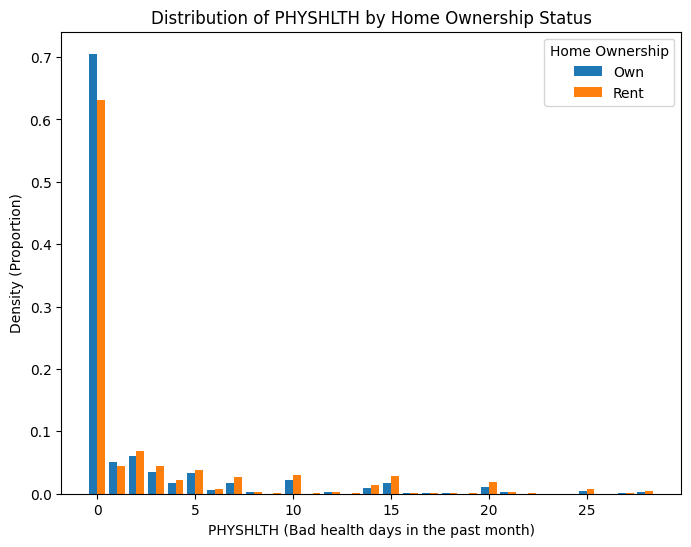

In [23]:
# Your code here
import matplotlib.pyplot as plt

# Separate PHYSHLTH values based on home ownership status
owners = df.loc[df["RENTHOM1"] == "Own", "PHYSHLTH"]
renters = df.loc[df["RENTHOM1"] == "Rent", "PHYSHLTH"]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(
    x=[owners, renters],
    label=["Own", "Rent"],
    bins=range(30),
    density=True,  # Show proportions instead of counts
    align="left"
)

# Set labels and title
ax.set_xlabel("PHYSHLTH (Bad health days in the past month)")
ax.set_ylabel("Density (Proportion)")
ax.set_title("Distribution of PHYSHLTH by Home Ownership Status")

# Add legend
ax.legend(title="Home Ownership")

# Show the plot
plt.show();

Then run this code to find the averages:

In [24]:
# Run this cell without changes
df.groupby("RENTHOM1")["PHYSHLTH"].mean()

RENTHOM1
Own     3.531213
Rent    5.197970
Name: PHYSHLTH, dtype: float64

Now, interpret the plot and averages. Does it seem like there a difference in the number of unhealthy days between those who rent their homes and those who own their homes? How does this compare to the distributions by state?

In [25]:
# Replace None with appropriate text
"""
Renters report more unhealthy days with average of 5.2 compared to homeowners with average of 3.5.
This shows a clear difference in health status based on home ownership. 
This gap of 1.67 days is larger than the differences observed between states, where the averages ranged from 3.69 to 4.38 bad health days.
Therefore, home ownership appears to be a stronger indicator of health status than geographic location, suggesting that factors like socioeconomic status or stability may influence health outcomes more than the state where someone lives.
"""

'\nRenters report more unhealthy days with average of 5.2 compared to homeowners with average of 3.5.\nThis shows a clear difference in health status based on home ownership. \nThis gap of 1.67 days is larger than the differences observed between states, where the averages ranged from 3.69 to 4.38 bad health days.\nTherefore, home ownership appears to be a stronger indicator of health status than geographic location, suggesting that factors like socioeconomic status or stability may influence health outcomes more than the state where someone lives.\n'

Now, choose and execute an appropriate statistical test. Make sure you describe why you chose the test, the null and alternative hypotheses, and what the result of the test means.

I choose t-test soce i will be comparing two categories of a numeric feature, to determine whether their means are the same across categories

In [26]:
# Your code here (create additional cells as needed)
#To compare the health status (represented by the PHYSHLTH variable, which is numeric) between two groups (homeowners vs. renters, which is categorical), we can use a t-test. Specifically, a two-sample independent t-test is appropriate because it compares the means of two independent groups (owners and renters) to determine if the difference in means is statistically significant.
𝜇_owners   =  3.531213
𝜇_renters =  5.197970
#Null and Alternative Hypotheses:
#Null Hypothesis (H₀): There is no difference in the average number of unhealthy days between homeowners and renters (i.e., the means are equal).
𝐻_0 : 𝜇_owners = 𝜇_renters
#Alternative Hypothesis (H₁): There is a difference in the average number of unhealthy days between homeowners and renters (i.e., the means are not equal).

𝐻_1 : 𝜇_owners =! 𝜇_renters


In [27]:
from scipy.stats import ttest_ind

# Separate PHYSHLTH data into two groups: Owners and Renters
owners = df.loc[df["RENTHOM1"] == "Own", "PHYSHLTH"]
renters = df.loc[df["RENTHOM1"] == "Rent", "PHYSHLTH"]

# Perform an independent t-test (assuming unequal variances)
t_stat, p_value = ttest_ind(owners, renters, equal_var=False)

# Display the t-statistic and p-value
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: -15.480104856835828
p-value: 1.078929864163519e-53


In [29]:
"""
t-statistic: -15.48 This value indicates the magnitude and direction of the difference between the means of the two groups (homeowners and renters). A negative t-statistic suggests that homeowners have fewer unhealthy days compared to renters, and the large absolute value signifies a substantial difference.
p-value: 1.08e-53 This extremely low p-value indicates that the probability of observing such a difference in means (or a more extreme difference) due to random chance, assuming the null hypothesis is true, is virtually zero. Since this p-value is much lower than the significance level of 0.05, it allows us to reject the null hypothesis, confirming that there is a statistically significant difference in health status between homeowners and renters.
"""

'\nt-statistic: -15.48 This value indicates the magnitude and direction of the difference between the means of the two groups (homeowners and renters). A negative t-statistic suggests that homeowners have fewer unhealthy days compared to renters, and the large absolute value signifies a substantial difference.\np-value: 1.08e-53 This extremely low p-value indicates that the probability of observing such a difference in means (or a more extreme difference) due to random chance, assuming the null hypothesis is true, is virtually zero. Since this p-value is much lower than the significance level of 0.05, it allows us to reject the null hypothesis, confirming that there is a statistically significant difference in health status between homeowners and renters.\n'

## 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Once again, this will require some preparation before we can run the statistical test. Create a new column `NICOTINE_USE` with 1 representing someone who uses or has used nicotine in some form, and 0 representing someone who hasn't.

We define nicotine use as:

* Answered `Yes` to the `SMOKE100` question (*Have you smoked at least 100 cigarettes in your entire life?*, page 43), OR
* Answered `Every day` or `Some days` to the `USENOW3` question (*Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all?*, page 46), OR
* Answered `Yes` to the `ECIGARET` question (*Have you ever used an e-cigarette or other electronic vaping product, even just one time, in your entire life?*, page 46)

If a record matches one or more of the above criteria, `NICOTINE_USE` should be 1. Otherwise, `NICOTINE_USE` should be 0. Go ahead and keep all of the "Don't know" or "Refused" answers as 0.

In [30]:
# Your code here
# Create the NICOTINE_USE column
df['NICOTINE_USE'] = 0  # Start by initializing the column with 0

# Update NICOTINE_USE to 1 based on the defined conditions
df.loc[(df['SMOKE100'] == 1) | 
       (df['USENOW3'].isin([1, 2])) |  # Assuming 1 = Every day, 2 = Some days
       (df['ECIGARET'] == 1), 
       'NICOTINE_USE'] = 1

# Check the value counts of the new NICOTINE_USE column
nicotine_counts = df['NICOTINE_USE'].value_counts()
print(nicotine_counts)
# Look at the distribution of values
df["NICOTINE_USE"].value_counts(normalize=True)

NICOTINE_USE
0    17980
1    13954
Name: count, dtype: int64


NICOTINE_USE
0    0.563036
1    0.436964
Name: proportion, dtype: float64

This time, let's treat health status as a categorical variable. We'll say that a "chronically sick" person is a person who reports that their physical health was not good for 15 or more out of the past 30 days. (This is a simplification but it will work for this analysis.)

In the cell below, create a new column of `df` called `CHRONIC`, which is 0 for records where `PHYSHLTH` is less than 15, and 1 for records where `PHYSHLTH` is 15 or more.

In [31]:
# Your code here
import numpy as np

df['CHRONIC'] = np.where(df['PHYSHLTH'] >= 15, 1, 0)
# View the distribution of the newly-created column
df["CHRONIC"].value_counts()

CHRONIC
0    28246
1     3688
Name: count, dtype: int64

Now we can view the crosstabs for these two categorical variables, as well as display their distributions:

In [32]:
# Run this cell without changes
contingency_table = pd.crosstab(index=df["CHRONIC"], columns=df["NICOTINE_USE"])
contingency_table

NICOTINE_USE,0,1
CHRONIC,,
0,16332,11914
1,1648,2040


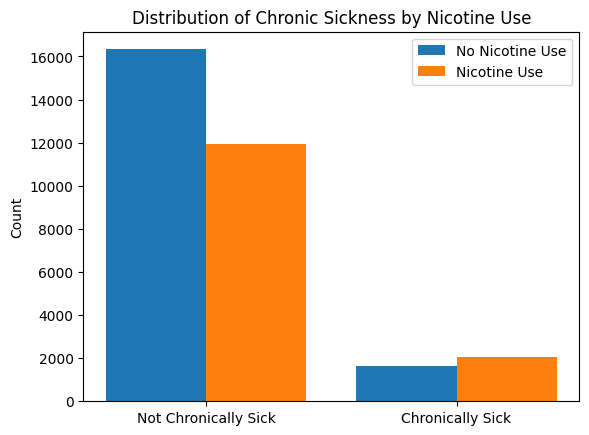

In [33]:
# Run this cell without changes

no_nicotine_use = df.loc[df["NICOTINE_USE"] == 0, "CHRONIC"]
nicotine_use = df.loc[df["NICOTINE_USE"] == 1, "CHRONIC"]

fig, ax = plt.subplots()

ax.hist(
    x=[no_nicotine_use, nicotine_use],
    label=["No Nicotine Use", "Nicotine Use"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["Not Chronically Sick", "Chronically Sick"])
ax.set_title("Distribution of Chronic Sickness by Nicotine Use")

ax.legend()
plt.show();

Once again, it appears that there is a difference in health outcomes between these categories. In the cell below, select an appropriate statistical test, describe the null and alternative hypotheses, execute the test, and interpret the result.

In [34]:
# Your code here (create additional cells as needed)
"""To analyze the difference in health outcomes (represented by the PHYSHLTH variable) between the two categories (chronically sick vs. not chronically sick), we can use a chi-squared test. This test is suitable because we are comparing the frequencies of two categorical variables: CHRONIC (0 for not chronically sick, 1 for chronically sick) and the health status as represented by the PHYSHLTH threshold."""

'To analyze the difference in health outcomes (represented by the PHYSHLTH variable) between the two categories (chronically sick vs. not chronically sick), we can use a chi-squared test. This test is suitable because we are comparing the frequencies of two categorical variables: CHRONIC (0 for not chronically sick, 1 for chronically sick) and the health status as represented by the PHYSHLTH threshold.'

### Hypotheses

*Null Hypothesis (H₀):* 
There is no association between nicotine use and chronic sickness. In other words, the distribution of chronic sickness is the same for those who use nicotine and those who do not.

$$ P(CHRONIC=1 | NICOTINE\_USE=1) = P(CHRONIC=1 | NICOTINE\_USE=0) $$

*Alternative Hypothesis (H₁):* 
There is an association between nicotine use and chronic sickness. In other words, the distribution of chronic sickness differs for those who use nicotine and those who do not.

$$ P(CHRONIC=1 | NICOTINE\_USE=1) \neq P(CHRONIC=1 | NICOTINE\_USE=0) $$

*Significance Level (α):* 
$$ \alpha = 0.05 $$

In [35]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create the contingency table
contingency_table = pd.crosstab(df['NICOTINE_USE'], df['CHRONIC'])

# Execute the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
chi2, p

(np.float64(228.22648537455362), np.float64(1.4525226945056695e-51))

### Chi-Squared Test Results
 *Chi-squared Statistic (chi2)*: 228.2 indicates the magnitude of the difference between the observed and expected frequencies. It is a high value suggesting that there is a greater discrepancy between nicotine use and chronic sickness
*P-value (p)*: 1.4525226945056695e-51 tells us we reject null hypothesis i.e there is an significant  association between nicotine use and chronic sickness


## 5. Choose Your Own Question

Now that you have investigated physical health and chronic sickness and their relationships with state, home ownership, and nicotine use, you will conduct a similar investigation with variables of your choosing.

Select an independent variable based on looking at the information in the data dictionary, and perform any additional transformations needed to use it in an analysis. Then set up, execute, and interpret a statistical test that addresses the relationship between that independent variable and `PHYSHLTH`.

(There is no solution branch for this question, and feel free to move on if you have already spent more than 1.5 hours on this lab.)

Your code here (create additional cells as needed)
# Research Question: Is there a relationship between the level of education completed (_EDUCAG) and the number of unhealthy days (PHYSHLTH) reported by individuals?

In [36]:
# Data Cleaning
import scipy.stats as stats
# Sample DataFrame setup (assuming df is already defined)
# Step 1: Transform the _EDUCAG variable into categorical labels
education_labels = {
    1: "Did not graduate High School",
    2: "Graduated High School",
    3: "Attended College or Technical School",
    4: "Graduated from College or Technical School",
    9: "Don’t know/Not sure/Missing"
}

# Create a new column with categorical education levels, excluding 'Don’t know/Not sure/Missing'
df['EDUCATION_LEVEL'] = df['_EDUCAG'].replace(education_labels)

# Exclude 'Don’t know/Not sure/Missing'
df = df[df['_EDUCAG'] != 9]

# Step 2: Create a new column for chronic health status
df['HEALTH_STATUS'] = pd.cut(df['PHYSHLTH'], bins=[0, 14, 30], labels=['Healthy', 'Unhealthy'])

# Step 3: Statistical Test (ANOVA)
anova_results = stats.f_oneway(
    df[df['_EDUCAG'] == 1]['PHYSHLTH'],
    df[df['_EDUCAG'] == 2]['PHYSHLTH'],
    df[df['_EDUCAG'] == 3]['PHYSHLTH'],
    df[df['_EDUCAG'] == 4]['PHYSHLTH']
)

### Null Hypothesis (H₀): There is no difference in the average number of unhealthy days (PHYSHLTH) across different education levels.

### Alternative Hypothesis (H₁): There is a difference in the average number of unhealthy days (PHYSHLTH) across different education levels.

In [45]:
# Output the ANOVA results
anova_statistic = anova_results.statistic
anova_p_value = anova_results.pvalue

print(f"ANOVA statistic: {anova_statistic}, p-value: {anova_p_value}")

# Step 4: Interpretation
alpha = 0.05
if anova_p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in unhealthy days across education levels.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in unhealthy days across education levels.")

ANOVA statistic: 251.75882781093594, p-value: 1.7644604234946824e-161
Reject the null hypothesis: There is a significant difference in unhealthy days across education levels.


### ANOVA Results Interpretation

The results of the ANOVA test yielded the following statistics:

- *ANOVA Statistic*: 251.76
- *p-value*: \(1.76 \times 10^{-161}\)

*Interpretation*:
The ANOVA test investigates whether there are significant differences in the number of unhealthy days (PHYSHLTH) reported by individuals across different education levels (_EDUCAG). 

Given the ANOVA statistic of *251.76* and a p-value of *\(1.76 \times 10^{-161}\), which is significantly lower than the common alpha level of **0.05*, we reject the null hypothesis. This indicates that there is a statistically significant difference in the average number of unhealthy days reported across different education levels.

*Conclusion*:
This finding suggests that the level of education completed has a meaningful impact on individuals' physical health, as measured by the number of unhealthy days. Further post-hoc analysis could be conducted to identify which specific education groups differ from each other.

## Conclusion

Congratulations, another cumulative lab down! In this lab you practiced reading a data dictionary, performing various data transformations with pandas, and executing statistical tests to address business questions.